This is an example of how to deal with a binary class imbalance problem in CatBoost and also Logistic Regression

Import libraries

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load datasets

In [179]:
#Reading train file:
train = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/german.csv', header=None)
train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201,2


In [180]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   int64 
 11  11      1000 non-null   object
 12  12      1000 non-null   int64 
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   int64 
 16  16      1000 non-null   object
 17  17      1000 non-null   int64 
 18  18      1000 non-null   object
 19  19      1000 non-null   object
 20  20      1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


Check for null values

In [181]:
train.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

Graphical representation

In [182]:
risk = train.groupby(20)[20].count()
risk/len(train)*100

20
1    70.0
2    30.0
Name: 20, dtype: float64

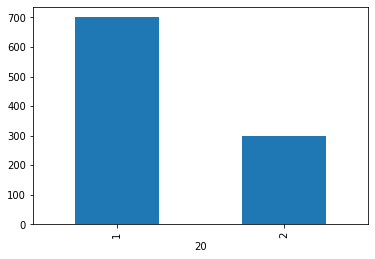

In [183]:
train.groupby(20)[20].count().plot.bar(ylim=0)
plt.show()

Define X and y

In [184]:
y = train[20]
X = train.drop([20], axis = 1)

Column transformer

In [185]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   int64 
 11  11      1000 non-null   object
 12  12      1000 non-null   int64 
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   int64 
 16  16      1000 non-null   object
 17  17      1000 non-null   int64 
 18  18      1000 non-null   object
 19  19      1000 non-null   object
dtypes: int64(7), object(13)
memory usage: 156.4+ KB


In [186]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

numeric_features = [1, 4, 7, 10, 12, 15, 17]
numeric_transformer = Pipeline(steps=[('imputer', IterativeImputer(random_state=1)),
    ('scaler', StandardScaler())])

categorical_features = [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19]
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
        ])

Split X for training and validation

In [187]:
#split training set for training and testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1, test_size=0.10, shuffle=True, stratify=y)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((900, 20), (100, 20), (900,), (100,))

Create Catboost pipeline

In [188]:
!pip install catboost

In [189]:
from sklearn.pipeline import make_pipeline, Pipeline
from catboost import CatBoostClassifier

model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', CatBoostClassifier(class_weights=[0.3, 0.7], iterations=500, learning_rate=0.1, depth=5, random_state=1))])
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0:	learn: 0.6697908	total: 6.05ms	remaining: 3.02s
1:	learn: 0.6506452	total: 7.86ms	remaining: 1.96s
2:	learn: 0.6294932	total: 9.36ms	remaining: 1.55s
3:	learn: 0.6159455	total: 10.8ms	remaining: 1.34s
4:	learn: 0.6018310	total: 12.2ms	remaining: 1.21s
5:	learn: 0.5922579	total: 13.7ms	remaining: 1.13s
6:	learn: 0.5812153	total: 15.1ms	remaining: 1.06s
7:	learn: 0.5721043	total: 16.5ms	remaining: 1.01s
8:	learn: 0.5632930	total: 17.9ms	remaining: 977ms
9:	learn: 0.5526683	total: 19.3ms	remaining: 948ms
10:	learn: 0.5421167	total: 20.8ms	remaining: 925ms
11:	learn: 0.5350390	total: 22.3ms	remaining: 905ms
12:	learn: 0.5278813	total: 23.7ms	remaining: 888ms
13:	learn: 0.5230082	total: 25.2ms	remaining: 874ms
14:	learn: 0.5154116	total: 26.6ms	remaining: 861ms
15:	learn: 0.5093009	total: 28ms	remaining: 848ms
16:	learn: 0.5020106	total: 29.5ms	remaining: 837ms
17:	learn: 0.4972431	total: 30.8ms	remaining: 825ms
18:	learn: 0.4908343	total: 32.2ms	remaining: 815ms
19:	learn: 0.4852556	tot

Predict on validation set

In [190]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.72


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


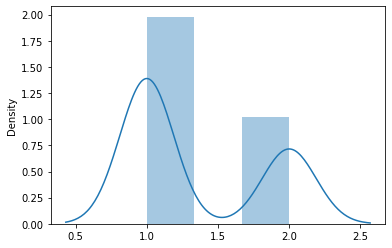

In [191]:
sns.distplot(y_pred)

In [192]:
from collections import Counter

print(Counter(y_pred))

Counter({1: 66, 2: 34})


In [193]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[54, 16],
       [12, 18]])

Create Logistic Regression Pipeline

In [194]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LogisticRegression(class_weight='balanced', max_iter=500, random_state=1, solver='liblinear'))])
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.75


Predict on Validation set

In [195]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.71


In [196]:
from collections import Counter

print(Counter(y_pred))

Counter({1: 53, 2: 47})


In [197]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[47, 23],
       [ 6, 24]])